<a href="https://colab.research.google.com/github/Andbwol/Sber_lesson2/blob/main/1_%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22HH_api_hometask_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание
* Cкачайте все вакансии СБЕРа из api hh.ru (https://github.com/hhru/api у апи есть ограничение в 2000, подумайте как его обойти)
* Извлеките все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
* Создайте DataFrame в котором будут даты публикации вакансий, названия, описания,  только добавьте поле ключевые навыки
* Переведите даты публикаций в формат datetime и постройте график опубликованных вакансий по датам
* Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите вакансии с использованием python, которые вам интересны
* Определите по полю с ключевыми навыками, какие навыки больше всего востребованы для найденных вакансий
* Постройте график наиболее востребованных навыков

In [ ]:
import requests
from tqdm.auto import tqdm

In [360]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}'

In [369]:
res = requests.get(url)
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

20

In [351]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [352]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [ ]:
all_vacancy_ids= []

In [376]:
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&&date_from=2023-01-01&date_to=2023-03-04'
    # дальше разбил по датам на 4 порции (каждая меньше 2000) и закачал
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

  0%|          | 0/17 [00:00<?, ?it/s]

In [379]:
len(all_vacancy_ids)

6484

In [ ]:
vac_id = 43326020
url = f'https://api.hh.ru/vacancies/{vac_id}'
res = requests.get(url)
vacancy = res.json()


In [378]:
vacancy = []
for i in all_vacancy_ids:
    url = f'https://api.hh.ru/vacancies/{i}'
    res = requests.get(url)
    vacancy.append(res.json())


In [380]:
len(vacancy)

6484

* Создайте DataFrame в котором будут даты публикации вакансий, названия, описания,  только добавьте поле ключевые навыки

# Задание
* Cкачайте все вакансии СБЕРа из api hh.ru (https://github.com/hhru/api у апи есть ограничение в 2000, подумайте как его обойти)
* Извлеките все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
* Создайте DataFrame в котором будут даты публикации вакансий, названия, описания,  только добавьте поле ключевые навыки
* Переведите даты публикаций в формат datetime и постройте график опубликованных вакансий по датам
* Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите вакансии с использованием python, которые вам интересны
* Определите по полю с ключевыми навыками, какие навыки больше всего востребованы для найденных вакансий
* Постройте график наиболее востребованных навыков

In [381]:
len(vacancy)

6484

In [382]:
import pandas as pd

In [383]:
rn = pd.DataFrame.from_dict(vacancy)

In [384]:
len(rn)

6484

In [385]:
rn_small = rn[["id", "published_at", "name" ,"description", "key_skills"]]

In [386]:
len(rn_small)

6484

In [387]:
print(rn_small.dtypes)

id              object
published_at    object
name            object
description     object
key_skills      object
dtype: object


In [ ]:
# Переведите даты публикаций в формат datetime и постройте график опубликованных вакансий по датам

In [388]:
rn_small['published_at'] = pd.to_datetime(rn_small['published_at'])

<ipython-input-388-19f96af4a76e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rn_small['published_at'] = pd.to_datetime(rn_small['published_at'])


In [389]:
print(rn_small.dtypes)

id                                             object
published_at    datetime64[ns, pytz.FixedOffset(180)]
name                                           object
description                                    object
key_skills                                     object
dtype: object


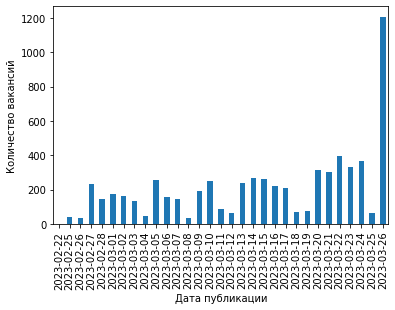

In [390]:
rn_small.groupby(rn_small['published_at'].dt.date).count().plot(kind='bar', y = 'id', ylabel = 'Количество вакансий', xlabel = 'Дата публикации', legend = 0 );

In [ ]:
#Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий

In [391]:
rn_small['day'] = rn_small['published_at'].dt.day_name()

<ipython-input-391-fb91fa47aa3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rn_small['day'] = rn_small['published_at'].dt.day_name()


In [392]:
from collections import Counter
Counter(rn_small['day'])

Counter({'Friday': 957,
         'Thursday': 908,
         'Saturday': 305,
         'Sunday': 1635,
         'Wednesday': 868,
         'Tuesday': 862,
         'Monday': 949})

In [393]:
# Найдите вакансии с использованием python, которые вам интересны

In [394]:
rn_small['skills']= ''
rn_small = rn_small.astype({'skills':object})

<ipython-input-394-6834b1a8f38c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rn_small['skills']= ''


In [395]:
rn_small['skills_str']= ''
rn_small = rn_small.astype({'skills_str':object})

In [396]:
for i in range(len(rn_small)):
  skills_str=""
  if len(rn_small['key_skills'][i]) !=0:
    for j in range(len(rn_small['key_skills'][i])):
      skills_str = skills_str + rn_small['key_skills'][i][j]['name']
  rn_small['skills_str'][i] = skills_str


<ipython-input-396-feaeda7f7aaf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rn_small['skills_str'][i] = skills_str


In [397]:
for i in range(len(rn_small)):
  skills=[]
  if len(rn_small['key_skills'][i]) !=0:
    for j in range(len(rn_small['key_skills'][i])):
      skills.append(rn_small['key_skills'][i][j]['name'])
  rn_small['skills'][i] = skills

<ipython-input-397-2e5340ffaef7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rn_small['skills'][i] = skills


In [398]:
c = 0
for i in range(len(rn_small)):
    if  rn_small['skills_str'][i].find('Python') >= 0:
        c += 1
print(c)

102


In [399]:
my_rn = rn_small[rn_small['name'].str.lower().str.find('аналитик')>= 0]

In [400]:
len(my_rn)

313

In [401]:
myrn_python = my_rn[my_rn['skills_str'].str.lower().str.find('python')>= 0]

In [402]:
len(myrn_python)

11

In [ ]:
# Определите по полю с ключевыми навыками, какие навыки больше всего востребованы для найденных вакансий

In [403]:
myrn_python=myrn_python.reset_index(drop=True)

In [404]:
skills=[]
for i in range(len(myrn_python)):
   skills = skills + myrn_python['skills'][i]

In [405]:
skills

['Python',
 'MS SQL',
 'Статистический анализ',
 'Qlik Sense',
 'Математическая статистика',
 'SQL',
 'Python',
 'Анализ данных',
 'Аналитическое мышление',
 'Английский язык',
 'SQL',
 'Python',
 'MS SQL',
 'PostgreSQL',
 'ClickHouse',
 'Metabase',
 'Tableau',
 'Python',
 'Математическая статистика',
 'A/B тесты',
 'Python',
 'SQL',
 'Data Mining',
 'Oracle BI',
 'Анализ данных',
 'Математический анализ',
 'MS SQL',
 'Python',
 'A/B тесты',
 'SQL',
 'Python',
 'PostgreSQL',
 'MS SQL',
 'Git',
 'Python',
 'SQL',
 'Анализ данных',
 'ETL',
 'PostgreSQL',
 'DWH',
 'Базы данных',
 'Анализ данных',
 'Системный анализ',
 'SCALA',
 'Spark',
 'Hadoop',
 'Python',
 'Big Data',
 'SQL',
 'SQL',
 'Python',
 'BPMN',
 'Python',
 'MS Visio',
 'PostgreSQL',
 'SQL']

In [406]:
Counter(skills)

Counter({'Python': 11,
         'MS SQL': 4,
         'Статистический анализ': 1,
         'Qlik Sense': 1,
         'Математическая статистика': 2,
         'SQL': 8,
         'Анализ данных': 4,
         'Аналитическое мышление': 1,
         'Английский язык': 1,
         'PostgreSQL': 4,
         'ClickHouse': 1,
         'Metabase': 1,
         'Tableau': 1,
         'A/B тесты': 2,
         'Data Mining': 1,
         'Oracle BI': 1,
         'Математический анализ': 1,
         'Git': 1,
         'ETL': 1,
         'DWH': 1,
         'Базы данных': 1,
         'Системный анализ': 1,
         'SCALA': 1,
         'Spark': 1,
         'Hadoop': 1,
         'Big Data': 1,
         'BPMN': 1,
         'MS Visio': 1})

In [ ]:
# Постройте график наиболее востребованных навыков

In [407]:
ski = pd.DataFrame(skills, columns=['skill'])

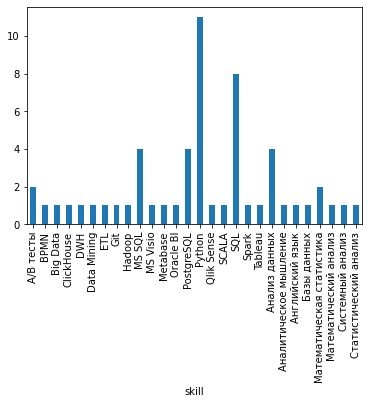

In [408]:
ski.groupby(["skill"]).value_counts().plot(kind='bar');